## **Task#2 To Explore Supervised Machine Learning**


## **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [33]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


#### Downloading the data set

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

#exploring and understanding the dataset
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Having a look at the descriptive statistics of the data which gives insights into the charactaristics of attributes

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the data for analysing it visually

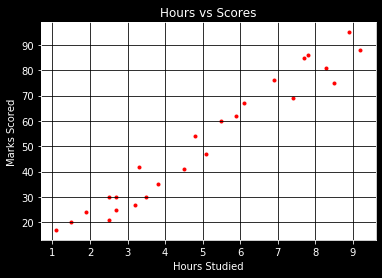

In [24]:
X = data['Hours']
Y = data['Scores']
plt.scatter(X,Y, label = 'Data Points', color = 'r', marker ='.')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.grid(color='black')
plt.rcParams['axes.facecolor']='white'
plt.style.use('dark_background')
plt.show()

##### The above graph clearly shows a linear relatio between our dependent variable (Scores) and independent variable (Hours)

#### Lets visualize the data with SEABORN ( which provides high level data visualization interface )

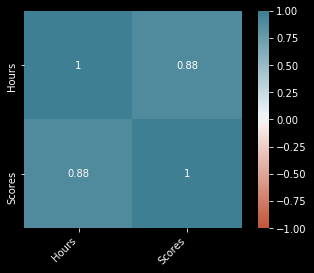

In [25]:
import seaborn as sb

correltn = data.corr(method='kendall')
ax = sb.heatmap(correltn,vmin=-1,vmax=1,center=0,cmap=sb.diverging_palette(20,220,n=200),square = True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment ='right')
plt.show()

##### Heat map shows that there is 88% correlation between the dependent and independent variables

#### Preparing the Data into attributes and lebels 

In [26]:
X = s_data.iloc[:, :-1].values  
Y = s_data.iloc[:, 1].values 

##### The next step is to split the dataset into the training and test dataset. The test dataset is 20% of the data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state=0)

#### Next we fit the linear regression model to train set and create an object called model_regressor in linear regression class

In [28]:
model_regressor = LinearRegression()
model_regressor.fit(X_train,Y_train)

LinearRegression()

#### Plotting The Regression Line

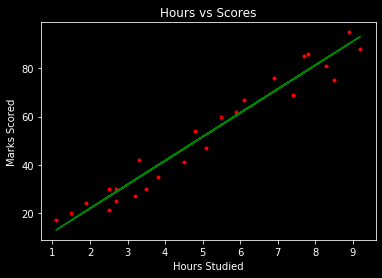

(array([9.91065648]), 2.018160041434683)

In [37]:
line = model_regressor.coef_ * X + model_regressor.intercept_   #fitting y=mX + C
plt.scatter(X,Y, color = 'r', marker ='.')
plt.plot(X, line , color = 'green')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.grid(color='black')
plt.rcParams['axes.facecolor']='white'
plt.style.use('dark_background')
plt.show()
model_regressor.coef_ , model_regressor.intercept_

#### Prediction of Test values and Accuracy check

In [31]:
Y_pred =  model_regressor.predict(X_test)
print(Y_pred)
print('Accuracy of our model is : {:.2f}'.format(model_regressor.score(X_test,Y_test)*100))

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Accuracy of our model is : 94.55


In [35]:
#Comparing the actual and predicted data

pred_data = pd.DataFrame({'Actual': Y_test.flatten() , 'Predicted': Y_pred.flatten()})
pred_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Plotting the Predicted and Actual Data for Comparision

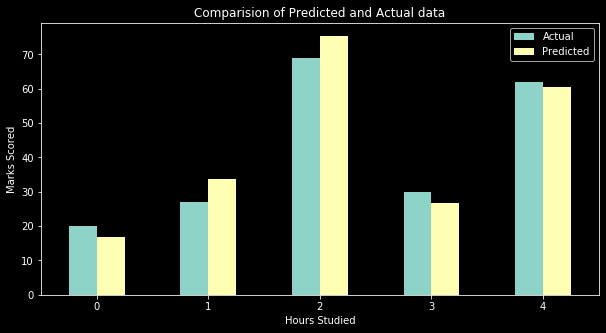

In [40]:
graph = pred_data.head()
plt.style.use('dark_background')
graph.plot(kind ='bar', figsize = (10,5), rot=0)
plt.title('Comparision of Predicted and Actual data')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.show()

In [41]:
# evaluation of the train and test score

print(f'The train score : {model_regressor.score(X_train,Y_train)*100}')
print(f'The test score : {model_regressor.score(X_test,Y_test)*100}')

The train score : 95.15510725211553
The test score : 94.54906892105356


#### Testing our own data

In [44]:
hours =[[9.25]]
pred = model_regressor.predict(hours)
print('Number of hours = {}'.format(hours))
print('Predicted Score for given time = {}'.format(pred))

Number of hours = [[9.25]]
Predicted Score for given time = [93.69173249]


#### Evaluation of our model
##### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(f'Mean Absolute Error :', mean_absolute_error(Y_test,Y_pred))
print(f'Mean Square Error :', mean_squared_error(Y_test,Y_pred))
print(f'Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error : 4.183859899002975
Mean Square Error : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665
